In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# задаем размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = [11.0, 5.0]

In [3]:
# я взял датафрейм с данными приложений из Google Play
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df = df.drop(columns=["Last Updated", "Current Ver", "Android Ver"]) 
# я решил что столбцы с версиями приложений и системы вряд ли 
# сильную связь с оценками и скачиваниями, последнее обновление тоже не очень информативно без частоты обновлений

In [5]:
# посмотрим, что с нашим датафреймом
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
dtypes: float64(1), object(9)
memory usage: 847.1+ KB


In [6]:
# путем работы головного мозга нашел строку в которой нет значения в столбце Категории
df.loc[df['Reviews'] == '3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


In [7]:
# удаляем эту строку и проверяем датафрейм
df = df.drop(df[df['Reviews'] == '3.0M'].index)
df.loc[df['Reviews'] == '3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres


In [8]:
# работаем с типами данных в столбцах
df['Reviews'] = df['Reviews'].astype('int64')
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].astype('float64')
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].astype('int64')

<ipython-input-8-5a830766bdfa>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')
<ipython-input-8-5a830766bdfa>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+', '')


In [9]:
# заполняем недостающие значения 
# Raiting  я заменил на 0, скорее всего есть ограничение по достижению которого рейтинг начинает учитываться
# Возможно стоит заменить на среднее значение, чтобы не искажать выборку
df['Rating'] = df['Rating'].fillna(0)

In [10]:
# посмотрим, что с нашим датафреймом теперь
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 931.6+ KB


In [11]:
# основные статистики нашего датафрейма
df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,3.621771,4.441529e+05,1.546434e+07,1.027368
std,1.514563,2.927761e+06,8.502936e+07,15.949703
min,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,3.700000,3.800000e+01,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


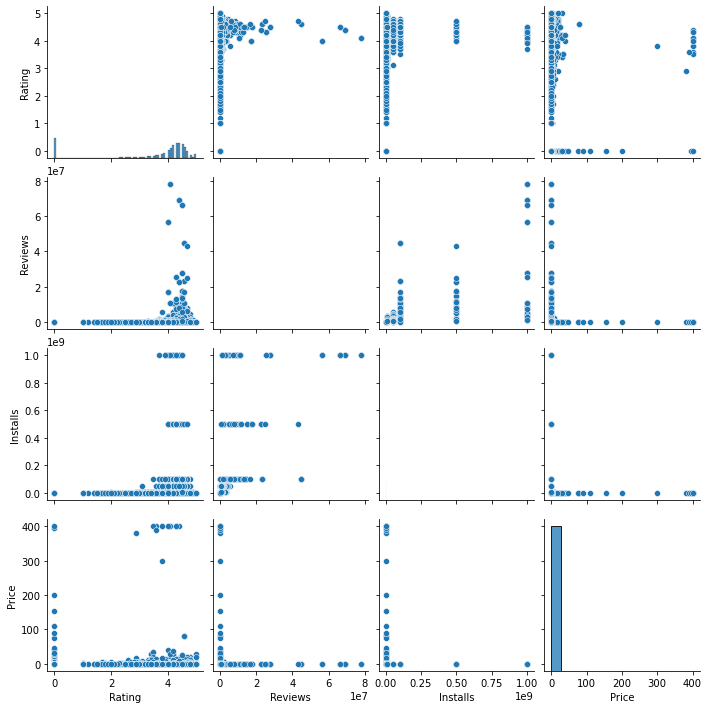

In [12]:
# посмотрим на связь этих показателей
sns.pairplot(df[['Rating', 'Reviews', 'Installs', 'Price']])

--Rating-- 
По графику 1.1 можно наблюдать нормальное распределение, мы видим что в основной массе приложения имеют высокие оценки, с длинным "хвостом" более низких и менее частых.
На графике 1.2 видно, что чем выше рейтинг, тем как правило больше отзывов.
График 1.3 говорит о том, что чем выше рейтинг, тем больше скачиваний, а на графике 1.4 видно, что как правило у платных приложений рейтинг выше, чем у бесплатных, но среди них много приложений не получивших рейтинг (возможно это узкопрофильные приложения с маленькой аудиторией).

Можно сделать вывод, что чем выше рейтинг, тем больше пользователей скачают наше приложение и оставят больше отзывов. Если наше приложение платное, то скорее всего его рейтинг будет выше, чем у бесплатных приложений, но пока что это гипотеза...

--Reviews--
Из графиков 2.3 и 2.4, только на 2.4 мы видим тенденцию, что у бесплатных приложений как правило больше рецензий.

--Installs--
Закономерно и здесь, на графике 3.4 - у бесплатных приложений намного больше скачиваний.

--Price--
Все о чем мы говорили выше видно на графиках взаимосвязи вышеперечисленных показателей с ценой.

In [13]:
# пора проверить нашу гипотезу, что рейтинг у платных приложений как правило выше:
# разделим наш датафрейм на два и исследуем взаимосвязь показателй рейтинга и цены
df1 = df.loc[df['Price'] == 0]
df2 = df.loc[df['Price'] > 0]

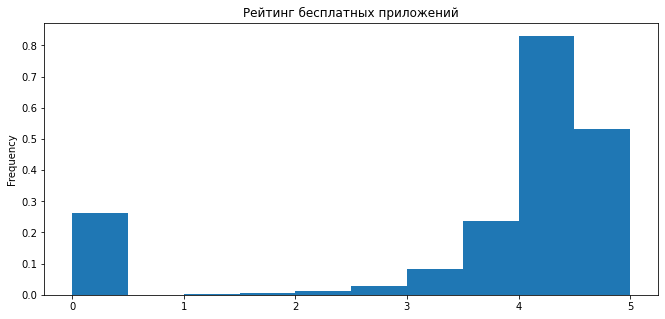

<AxesSubplot:title={'center':'Рейтинг платных приложений'}, ylabel='Frequency'>

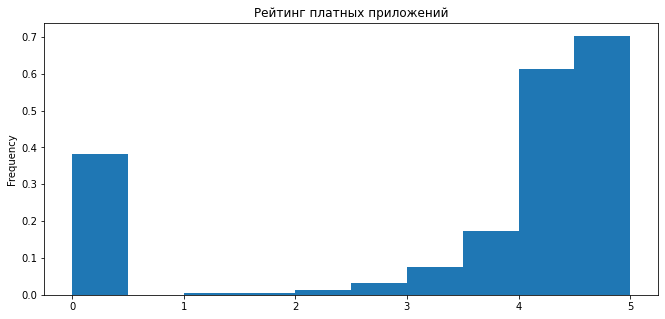

In [14]:
df1['Rating'].plot(kind='hist', 
                  title='Рейтинг бесплатных приложений',
                  bins=10,
                  density=True)
plt.show()
df2['Rating'].plot(kind='hist', 
                  title='Рейтинг платных приложений',
                  bins=10,
                  density=True)

Из двух графиков видно, что пользователи бесплатных приложений реже ставят максимальные оценки, чем пользователи платных приложений, которые как правило ставят максимальный балл. Моя гипотеза подтвердилась.

Продолжаем развивать нашу идею: Посмотрим есть ли взаимосвязь между ретийнгом приложения, его стоимостью и количеством скачиваний:

<AxesSubplot:title={'center':'Корелляция стоимости, Рейтинга и скачиваний'}, xlabel='Price', ylabel='Rating'>

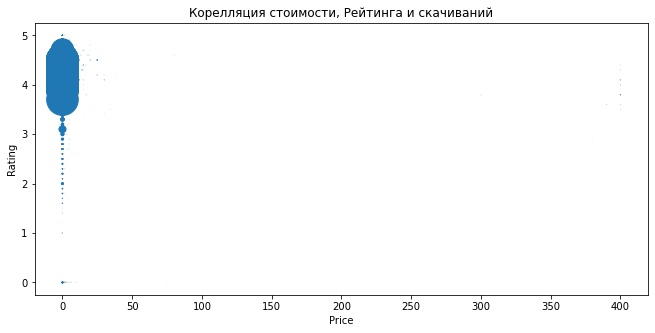

In [15]:
df.plot(kind='scatter', 
        x='Price', 
        y='Rating', 
        s=df.Installs/1000000, # данные имеют очень большой разброс
        title='Корелляция стоимости, Рейтинга и скачиваний'
       )

Как мы видим больше всего скачиваний ожидаемо имеют бесплатные приложения, но и в них величина рейтинга влияет на количество установок. Самые популярные приложения как правило имеют высокий рейтинг, что приводит к еще большему росту скачиваний.

Еще немного исследуем рейтинг и посмотрим какой он в разрезе жанров:

In [16]:
# подготовим наш датафрейм
df_genre = df[['Rating', 'Genres']].groupby('Genres').mean().sort_values(['Rating'], ascending=[False]).head(30)
df_genre = df_genre.sort_values(['Rating'])

In [17]:
# обновим размер графика
from pylab import rcParams
rcParams['figure.figsize'] = [11.0, 15.0]

<AxesSubplot:title={'center':'Platforms by Global Sales'}, ylabel='Rating'>

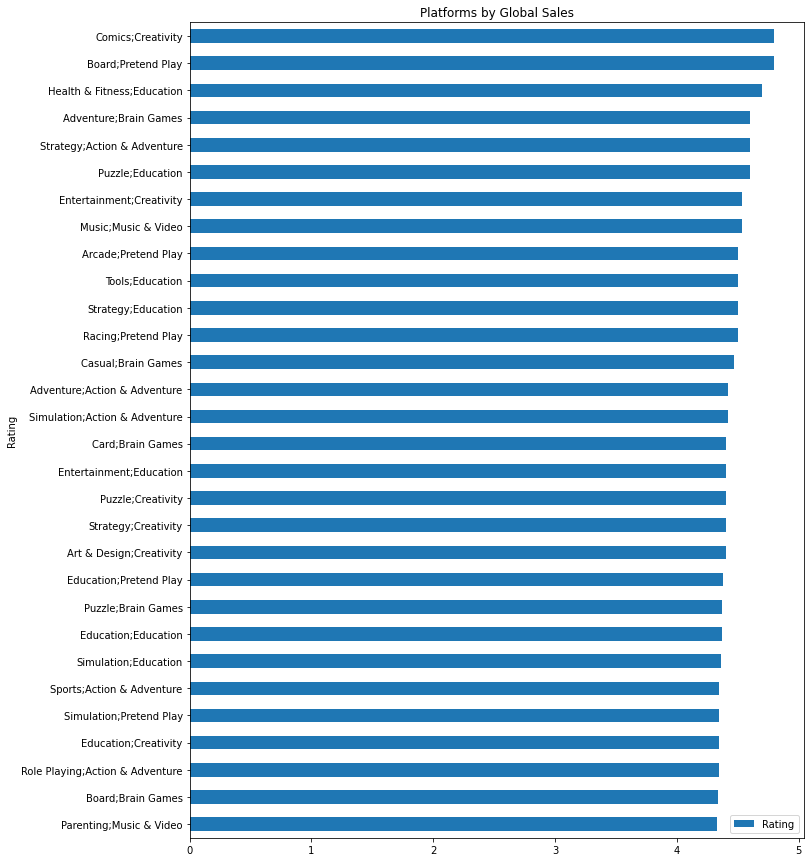

In [18]:
# визуализируем наш датафрейм
df_genre.plot(kind='barh', 
              title='Platforms by Global Sales',
              xlabel='Rating',
              ylabel='Genres')

Удивительно, но в среднем наиболее высоко оцененным являются не игры, а комиксы. Хотя может быть это характерно лишь для этой выборки.